<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

# Описание домашнего задания

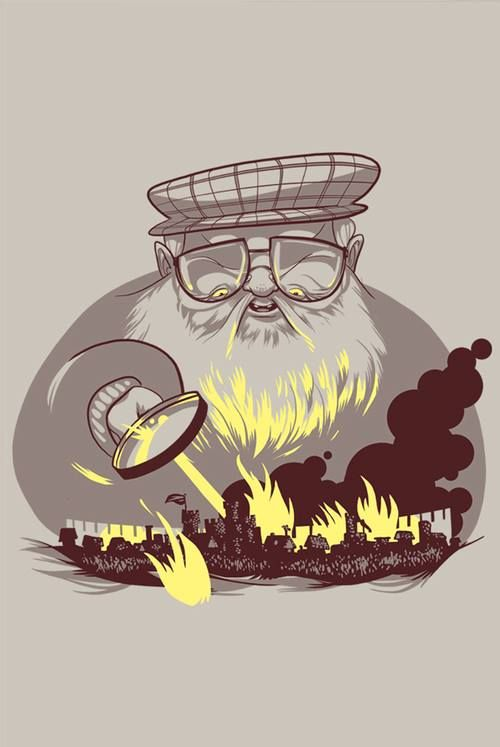

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.

1. Скачайте датасет, проведите разведочный анализ данных **(3 балла)**

2. Обучите несколько моделей из библиотеки `sklearn` для задачи классификации **(1 балла)**

3. Сравните модельки на метриках.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **DateoFdeath**: дата смерти

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
# !gdown 1NKWoXr5BVTyZOpqi-S5GahXdrY3kHzSh

### **Задание 1.1.**

Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 15,
        'axes.labelsize': 15,
        'xtick.labelsize': 15,
        'ytick.labelsize': 15,
        'font.size': 15,
        'figure.figsize': (8, 6),
        'axes.grid': True,
        'grid.linestyle': '-',
        'grid.alpha': 0.3,
        'lines.markersize': 5.0,
        'xtick.minor.visible': True,
        'xtick.direction': 'in',
        'xtick.major.size': 20.0,
        'xtick.minor.size': 10.0,
        'xtick.top': False,
        'xtick.bottom': True,
        'ytick.minor.visible': True,
        'ytick.direction': 'in',
        'ytick.major.size': 12.0,
        'ytick.minor.size': 6.0,
        'ytick.right': True,
        'errorbar.capsize': 0.0,
    })

import warnings
warnings.filterwarnings('ignore')

### **Задание 1.2.** 

Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data_train = pd.read_csv("../data/hw_4_2_GoT/game_of_thrones_train.csv", index_col='S.No')
data_test = pd.read_csv("../data/hw_4_2_GoT/game_of_thrones_test.csv", index_col='S.No')

print(f"train data shape -> {data_train.shape}")
print(f"test data shape -> {data_test.shape}")

target_col = [i for i in data_train.columns if not i in data_test.columns][0]
print(f"target column - {target_col}")

train data shape -> (1557, 25)
test data shape -> (389, 24)
target column - isAlive


### **Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [6]:
data_train.isna().sum()

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

Проверяем, в тех же ли колонках содержатся пропуски в тестовой выборке. <br>
Таких колонок нет

In [7]:
train_nan_cols = data_train.columns[data_train.isna().sum() > 0]
test_nan_cols = data_test.columns[data_test.isna().sum() > 0]

[col for col in test_nan_cols if not col in train_nan_cols]

[]

Колонки с пропусками

In [8]:
print("Percent of NaNs:")

for col in data_train.columns:
    n_nulls = data_train[col].isna().sum()
    if n_nulls > 0:
        print(f"[{data_train[col].dtype}]", end=" ")
        print(col, round(n_nulls / len(data_train) * 100, 2), sep=" -> ")

Percent of NaNs:
[object] title -> 53.95
[object] culture -> 68.66
[float64] dateOfBirth -> 82.08
[object] mother -> 98.84
[object] father -> 98.59
[object] heir -> 98.65
[object] house -> 24.47
[object] spouse -> 87.15
[float64] isAliveMother -> 98.84
[float64] isAliveFather -> 98.59
[float64] isAliveHeir -> 98.65
[float64] isAliveSpouse -> 87.15
[float64] age -> 82.08


Пропуски в колонках одни и те же

* `age` и `dateOfBirth`
* `mother` и `isAliveMother`
* `father` и `isAliveFather`
* `heir` и `isAliveHeir`
* `spouse` и `isAliveSpouse`

In [9]:
print((data_train.age.isna() == data_train.dateOfBirth.isna()).sum() / len(data_train))
print((data_train.mother.isna() == data_train.isAliveMother.isna()).sum() / len(data_train))
print((data_train.father.isna() == data_train.isAliveFather.isna()).sum() / len(data_train))
print((data_train.heir.isna() == data_train.isAliveHeir.isna()).sum() / len(data_train))
print((data_train.spouse.isna() == data_train.isAliveSpouse.isna()).sum() / len(data_train))

1.0
1.0
1.0
1.0
1.0


#### Простое заполнение пропусков

Самое незамысловатое решение

In [10]:
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.utils import Bunch
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [11]:
class MySimpleImputer(TransformerMixin, BaseEstimator):
    def __init__(self):
        self.feature_values = {}
        self.current_date = 300.0

    def fit(self, X, y=None):
        """Fit models to predict missing values for each column."""
        X = pd.DataFrame(X)

        self.current_date = (X['age'] + X['dateOfBirth']).value_counts().index[0]

        self.feature_values['title'] = X['title'].mode()[0]
        self.feature_values['culture'] = "Unknown"
        self.feature_values['age'] = X['age'].median()
        self.feature_values['dateOfBirth'] = self.current_date - self.feature_values['age']
        self.feature_values['mother'] = "Unknown"
        self.feature_values['father'] = "Unknown"
        self.feature_values['heir'] = "Unknown"
        self.feature_values['spouse'] = "Unknown"
        self.feature_values['isAliveMother'] = -1
        self.feature_values['isAliveFather'] = -1
        self.feature_values['isAliveHeir'] = -1
        self.feature_values['isAliveSpouse'] = -1
        self.feature_values['house'] = "Unknwon"

        return self

    def transform(self, X):
        """Impute missing values for each column using trained models."""
        X = pd.DataFrame(X)
        X_imputed = X.copy()

        for col in X.columns:
            missing_mask = X[col].isna()
            
            if missing_mask.sum() > 0:
                X_imputed[col] = X_imputed[col].fillna(self.feature_values[col])

        return X_imputed

In [12]:
imputer = MySimpleImputer()

pipeline = Pipeline(steps=[
    ('imputer', imputer)
])

# pd.DataFrame(pipeline.fit_transform(data_train))
imputer.fit(data_train)
data_train_imputed = imputer.transform(data_train)
data_test_imputed = imputer.transform(data_test)

In [13]:
data_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             1557 non-null   object 
 2   male              1557 non-null   int64  
 3   culture           1557 non-null   object 
 4   dateOfBirth       1557 non-null   float64
 5   mother            1557 non-null   object 
 6   father            1557 non-null   object 
 7   heir              1557 non-null   object 
 8   house             1557 non-null   object 
 9   spouse            1557 non-null   object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     1557 non-null   float64
 16  isAliveFather     1557 non-null   float64
 17  

Попробуем написать класс для заполнения пропусков с помощью `CatBoost` моделей

In [14]:
class CatBoostImputer(TransformerMixin):
    def __init__(self, feature_list=None):
        # Dictionary to store models and column types
        self.models_ = Bunch()
        self.column_types_ = Bunch()
        self.feature_list = feature_list if feature_list is not None else []

    def fit(self, X, y=None):
        """Fit models to predict missing values for each column."""
        X = pd.DataFrame(X)
        self.models_ = Bunch()  # Store a model for each column with missing values
        self.column_types_ = Bunch()  # Store column type: 'categorical' or 'numeric'

        for col in X.columns:
            if X[col].dtype == object:
                X[col] = X[col].astype('category')

        cat_cols = X.columns[X.dtypes == 'category'].tolist()
        print(f"Categorical features: {cat_cols}")

        for col in X.columns:
            print(col)
            missing_mask = X[col].isna()
            
            if missing_mask.sum() > 0:  # If there are missing values
                X_train = X.loc[~missing_mask].drop(columns=[col])  # Features for training
                X_train = X[self.feature_list]
                y_train = X.loc[~missing_mask, col]  # Target column values (non-missing)

                # Determine if column is numeric or categorical
                if pd.api.types.is_numeric_dtype(X[col]):
                    # print(f"type = numeric")
                    self.column_types_[col] = 'numeric'
                    cat_features = [i for i in cat_cols if not i == col]
                    model = CatBoostRegressor(verbose=0, cat_features=cat_features)
                else:
                    # print(f"type = categorical")
                    self.column_types_[col] = 'categorical'
                    cat_features = [i for i in cat_cols if not i == col]
                    model = CatBoostClassifier(verbose=0, cat_features=cat_features)

                model.fit(X_train, y_train)
                self.models_[col] = model

        return self

    def transform(self, X):
        """Impute missing values for each column using trained models."""
        X = pd.DataFrame(X)
        X_imputed = X.copy()

        for col in X.columns:
            missing_mask = X[col].isna()
            
            if missing_mask.sum() > 0 and col in self.models_:
                X_missing = X_imputed.loc[missing_mask].drop(columns=[col])  # Features for predicting
                model = self.models_[col]
                
                # Predict missing values and fill them
                X_imputed.loc[missing_mask, col] = model.predict(X_missing)

        return X_imputed

# Example usage:
# X is a pandas DataFrame with missing values
# imputer = CatBoostImputer()
# X_imputed = imputer.fit_transform(X)

In [15]:
cols_to_select = ['title', 'male', 'culture', 'dateOfBirth', 'house',
                 'book1', 'book2', 'book3', 'book4', 'book5',
                 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
                 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity']

cols_to_train = ['title', 'male', 'culture', 'house',
                 'book1', 'book2', 'book3', 'book4', 'book5',                 
                 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity']

data_train[cols_to_train].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             717 non-null    object 
 1   male              1557 non-null   int64  
 2   culture           488 non-null    object 
 3   house             1176 non-null   object 
 4   book1             1557 non-null   int64  
 5   book2             1557 non-null   int64  
 6   book3             1557 non-null   int64  
 7   book4             1557 non-null   int64  
 8   book5             1557 non-null   int64  
 9   isMarried         1557 non-null   int64  
 10  isNoble           1557 non-null   int64  
 11  age               279 non-null    float64
 12  numDeadRelations  1557 non-null   int64  
 13  popularity        1557 non-null   float64
dtypes: float64(2), int64(9), object(3)
memory usage: 182.5+ KB


### **Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


#### isPopular

Тут ещё  можно построить график зависмости вероятности смерти (жизни) от популярности

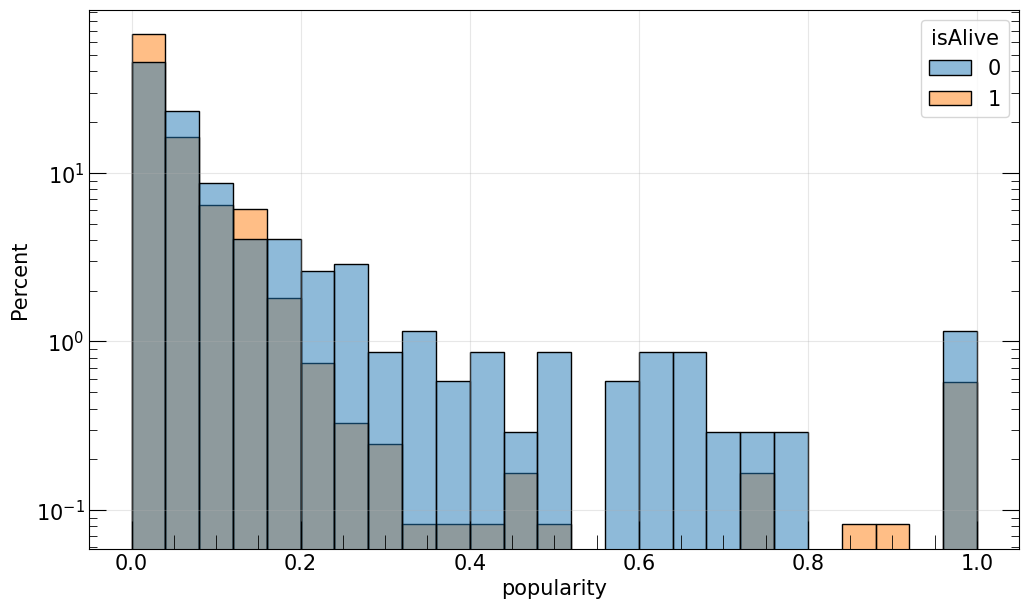

In [20]:
plt.figure(figsize=(12, 7))
sns.histplot(data=data_train_imputed, x='popularity', common_norm=False,
             stat='percent', hue='isAlive', bins=25)
ax = plt.gca()
ax.set_yscale('log')
plt.show()

In [21]:
cut_alive = data_train_imputed['isAlive'] > 0

print("Alive popularity mean = %.5f, std = %.5f" %
      (data_train[cut_alive]['popularity'].mean(), data_train[cut_alive]['popularity'].std()))
print("Not alive popularity mean = %.5f, std = %.5f" % 
      (data_train[~cut_alive]['popularity'].mean(), data_train[~cut_alive]['popularity'].std()))

Alive popularity mean = 0.04983, std = 0.10056
Not alive popularity mean = 0.10658, std = 0.16901


Видно, что в среднем мёртвые персонажи более популярны, однако мне не очевидно, где здесь поставить кат, поэтому возьму некое полупроизвольное число `popularity = 0.1`

In [22]:
popularity_thr = 0.1

data_train_imputed['isPopular'] = (data_train_imputed.popularity > popularity_thr).astype(np.int8)
data_test_imputed['isPopular'] = (data_test_imputed.popularity > popularity_thr).astype(np.int8)

data_train_imputed.groupby("isPopular").agg({"isAlive": "value_counts"}).sort_index()

isAlive
isPopular isAlive         
0         0            258
          1           1051
1         0             87
          1            161

#### boolDeadRelations

Вероятность смерти персонажа намного ниже, если у него нет связей с мёртвыми персонажами

In [23]:
data_train_imputed['boolDeadRelations'] = (data_train_imputed['numDeadRelations'] > 0).astype(np.int8)
data_test_imputed['boolDeadRelations'] = (data_test_imputed['numDeadRelations'] > 0).astype(np.int8)

data_train_imputed['boolDeadRelations'].value_counts()

boolDeadRelations
0    1488
1      69
Name: count, dtype: int64

In [24]:
data_train_imputed.groupby("boolDeadRelations").agg({"isAlive": "value_counts"}).sort_index()

isAlive
boolDeadRelations isAlive         
0                 0            306
                  1           1182
1                 0             39
                  1             30

#### culture

In [25]:
df_cultures = data_train_imputed.groupby("culture")['name'].count().sort_index()
df_cultures

culture
Andal                         1
Andals                        1
Astapori                      4
Braavos                       1
Braavosi                     39
Crannogmen                    2
Dorne                         1
Dornish                      17
Dornishmen                    3
Dothraki                     17
First Men                     2
Free Folk                    45
Free folk                     7
Ghiscari                     17
Ghiscaricari                  1
Ironborn                     91
Ironmen                       3
Lhazareen                     1
Lhazarene                     1
Lysene                        2
Lyseni                        1
Meereenese                    2
Myrish                        2
Northern mountain clans       3
Northmen                     94
Norvoshi                      1
Pentoshi                      1
Qarth                         1
Qartheen                      5
Qohor                         1
Reach                        13


In [26]:
for i in df_cultures.index:
    if "north" in i.lower():
        print(i)

Northern mountain clans
Northmen
northmen


In [27]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari', 'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen', "Northern mountain clans"],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Ironborn': ['Ironmen', 'ironborn'],
    'Lhazareen': ['Lhazarene'],
    'Vale': ['Vale mountain clans', 'Valemen']
}

In [28]:
def transform_culture(c: str, culture_dict: dict) -> str:
    default_value = "Not Found"
    for k, v in culture_dict.items():
        if c in v or c.lower() in [i.lower() for i in v]:
            return k
    return c

In [29]:
data_train_imputed['culture'] = data_train_imputed['culture'].apply(lambda x: transform_culture(x, cult))
data_test_imputed['culture'] = data_test_imputed['culture'].apply(lambda x: transform_culture(x, cult))

## **Задание 1.5.**
Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [30]:
import json

In [31]:
data_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              1557 non-null   object 
 2   male               1557 non-null   int64  
 3   culture            1557 non-null   object 
 4   dateOfBirth        1557 non-null   float64
 5   mother             1557 non-null   object 
 6   father             1557 non-null   object 
 7   heir               1557 non-null   object 
 8   house              1557 non-null   object 
 9   spouse             1557 non-null   object 
 10  book1              1557 non-null   int64  
 11  book2              1557 non-null   int64  
 12  book3              1557 non-null   int64  
 13  book4              1557 non-null   int64  
 14  book5              1557 non-null   int64  
 15  isAliveMother      1557 non-null   float64
 16  isAliveFather      1557 non-n

In [32]:
column_types = {
    "skip": [],
    "numerical": [],
    "binary": [],
    "categorical": [],
}

cols_to_skip = ['name']

for col in data_train_imputed.columns:
    if col == target_col:
        continue
    if col in cols_to_skip:
        column_types['skip'].append(col)
    elif data_train_imputed[col].dtype == object:
        column_types['categorical'].append(col)
    elif data_train_imputed[col].nunique() < 3:
        column_types['binary'].append(col)
    else:
        column_types['numerical'].append(col)

print(json.dumps(column_types, indent=4))

{
    "skip": [
        "name"
    ],
    "numerical": [
        "dateOfBirth",
        "isAliveMother",
        "isAliveFather",
        "isAliveHeir",
        "isAliveSpouse",
        "age",
        "numDeadRelations",
        "popularity"
    ],
    "binary": [
        "male",
        "book1",
        "book2",
        "book3",
        "book4",
        "book5",
        "isMarried",
        "isNoble",
        "isPopular",
        "boolDeadRelations"
    ],
    "categorical": [
        "title",
        "culture",
        "mother",
        "father",
        "heir",
        "house",
        "spouse"
    ]
}


In [33]:
bin_edges_num_cols = []
num_cols_to_log = [] 


for col in column_types['numerical']:
    bin_edges = np.histogram_bin_edges(data_train_imputed[col], bins=10)
    bin_edges_num_cols.append(bin_edges)
    num_cols_to_log.append(False)

integer_col_dict = {}
for i_col, col in enumerate(column_types['numerical']):
    integer_col_dict[col] = {
        'bin_edges': bin_edges_num_cols[i_col],
        'to_log': num_cols_to_log[i_col]
    }

### Статистические тесты и графики
#### Числовые переменные

In [34]:
from scipy import stats

In [35]:
def custom_binning(data: pd.DataFrame, col: str, target: str, bin_edges: list[float], include_zero: bool):
    """
    Вычисление относительно бинарного признака таргет значений вероятности принадлежности к классу 1 таргета.
    Вероятность является средней в бине по границам биновЮ поданных на входе
    
    Parameters
    ----------
    data : pd.DataFrame
        Набор данных для проверки
    col : str
        Признак, для которого будут вычисляться вероятности
    target : str
        Признак (обычно целевая переменная), вероятность которого вычисляется
    bin_edges : list[float]
        Границы бинов
    include_zero : bool
        Добавлять ли нулевой бин
        
    Returns
    -------
    custom_binning : np.ndarray
        Вероятность значения 1 целевого признака (target) в бинах по исследуемому признаку (col)
    """
    bin_values = [
        data[(data[col] > bin_edges[i])
             & (data[col] <= bin_edges[i + 1])].shape[0]
        for i in range(len(bin_edges) - 1)
    ]
    bin_values_pos = [
        data[(data[col] > bin_edges[i])
             & (data[col] <= bin_edges[i + 1])
             & (data[target] > 0)].shape[0]
        for i in range(len(bin_edges) - 1)
    ]

    if (include_zero):
        bin_values = [data[data[col] == 0].shape[0]] + bin_values
        bin_values_pos = [
            data[(data[col] == 0)
                 & (data[target] > 0)].shape[0]
        ] + bin_values_pos

    return (np.array(bin_values_pos) / np.array(bin_values))

In [36]:
def integer_feature_test(data: pd.DataFrame, integer_col_dict: dict, col: str,
                         target: str) -> None:
    """
    Построение графика целочисленного признака относительно целевой переменной
    
    Parameters
    ----------
    data : pd.DataFrame
        Набор данных для проверки
    col : str
        Исследуемый признак
    traget : str
        Целевой признак
        
    Returns
    -------
    None
    """
    data_temp = data[[col, target]]
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    sns.histplot(data=data_temp,
                 x=col,
                 hue=target,
                 multiple="layer",
                 ax=axs[0],
                 alpha=0.5)

    text = f"mean = {data[col].mean():.2f}, std = {data[col].std():.2f}"
    axs[0].plot([], [], ' ', label=text)

    correlation = round(data_temp[[col, target]].corr(method='spearman').iloc[0, 1], 3)
    axs[0].set_xlabel(f"{col}")
    axs[0].set_yscale('log')

    bin_edges = integer_col_dict[col]['bin_edges']
    bin_centers = [(bin_edges[i]+bin_edges[i+1])/2 for i in range(len(bin_edges)-1)]
    bin_values = custom_binning(data_temp, col, target, bin_edges, include_zero=True)
    bin_centers = [0] + bin_centers

    axs[1].plot(bin_centers, bin_values, 'o-r')
    axs[1].set_xlabel(f'{col}')
    axs[1].set_ylabel('Probability of class 1')

    plt.suptitle(f"correlation with {target} = {correlation}")
    plt.show()

    return correlation

Тест Манна-Уитни принадлежности к разным выборкам. Применяется к `numerical` признакам относительно целевой переменной

In [37]:
def mann_whitney(data: pd.DataFrame, column: str, target: str, alpha: float = 0.05)-> tuple:
    """
    Непараметрический тест на принадлежность подвыборок одной выборке.
    
    Parameters
    ----------
    data : pd.DataFrame
        Набор данных для проверки
    column : str
        Признак, распределения которого будут проверяться
    target : str
        Признак (обычно целевая переменная), по которому выборка будет делиться на две подвыборки
    alpha : float
        Критическое значение p-value. Если значение p-value ниже этого параметра, нулевая гипотеза 
        о принадлежности распределений одной выборке отбрасывается.
        
    Returns
    -------
    stat : float
    p_value : float
    """
    print(f'Mann_Whitney test for |{column}|')
    x1 = data.loc[data[target] == 0, column]
    x2 = data.loc[data[target] != 0, column]
    stat, p_value = stats.mannwhitneyu(x1, x2)
    print(f'statistics = {stat}')
    print(f'p-value = {p_value}')
    if p_value < alpha:
        print('H0 rejected')
    else:
        print('H0 accepted')
    return stat, p_value

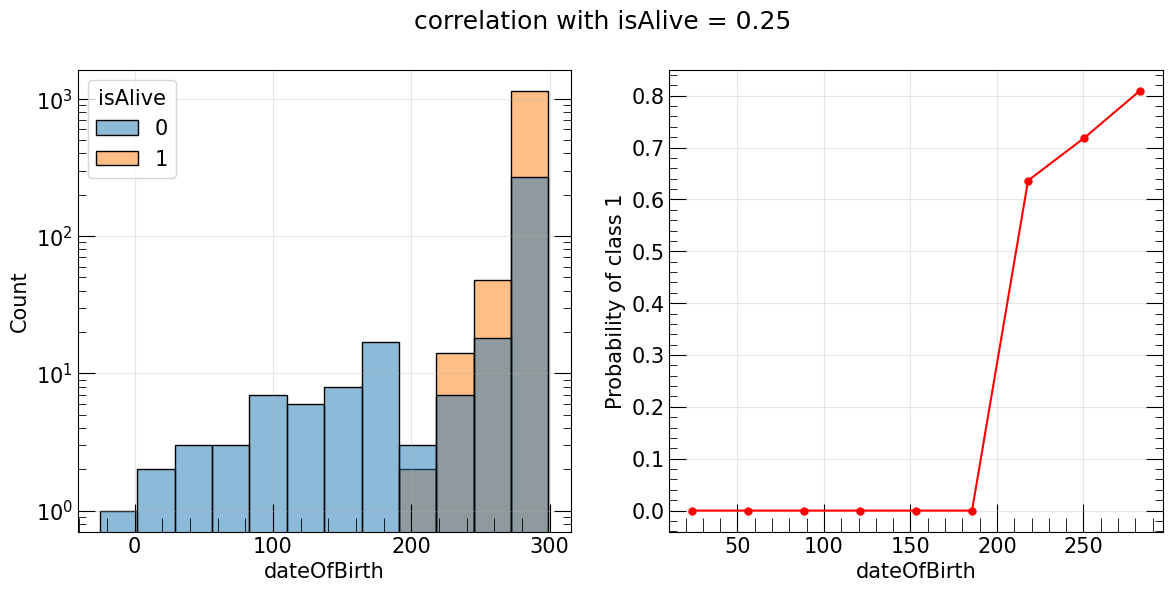

Mann_Whitney test for |dateOfBirth|
statistics = 161229.5
p-value = 7.431460777333803e-23
H0 rejected


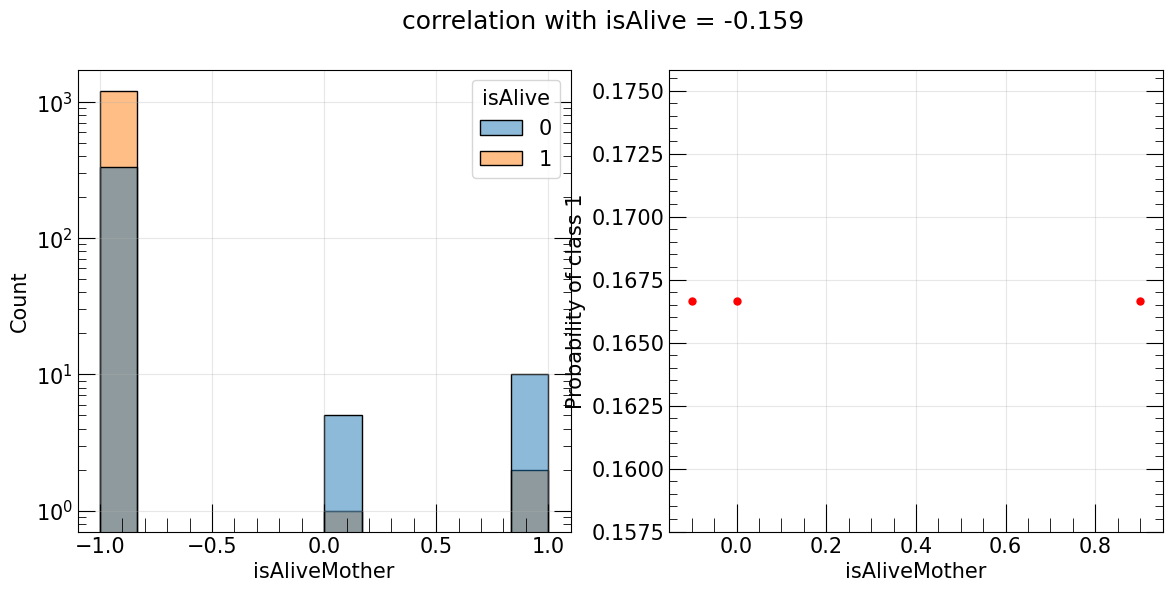

Mann_Whitney test for |isAliveMother|
statistics = 217642.5
p-value = 3.3126883573011517e-10
H0 rejected


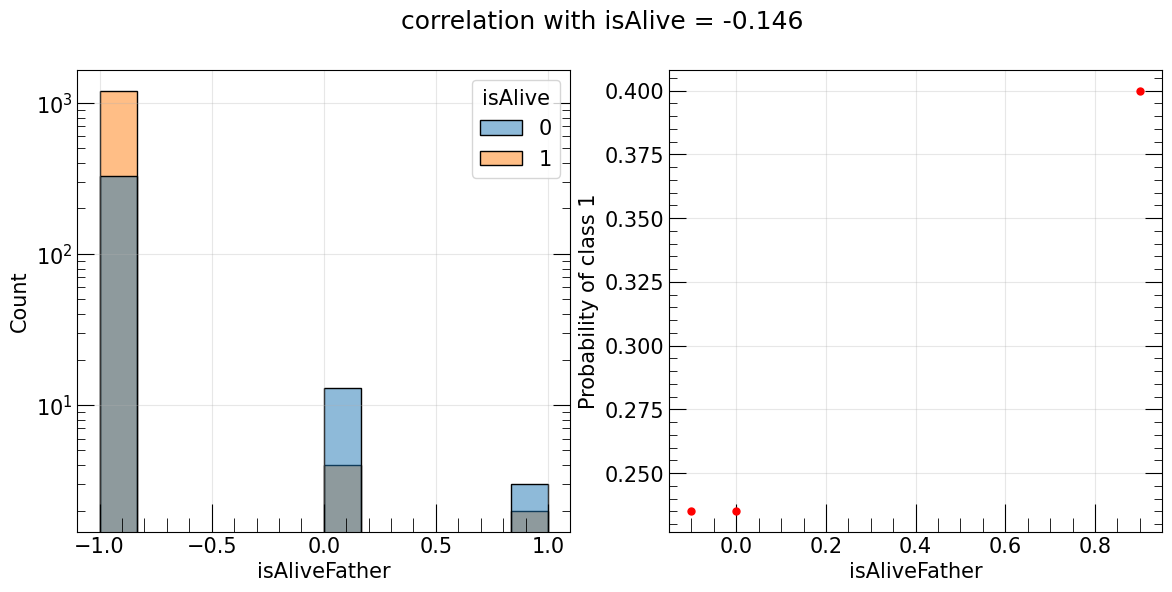

Mann_Whitney test for |isAliveFather|
statistics = 217724.0
p-value = 9.190340691156956e-09
H0 rejected


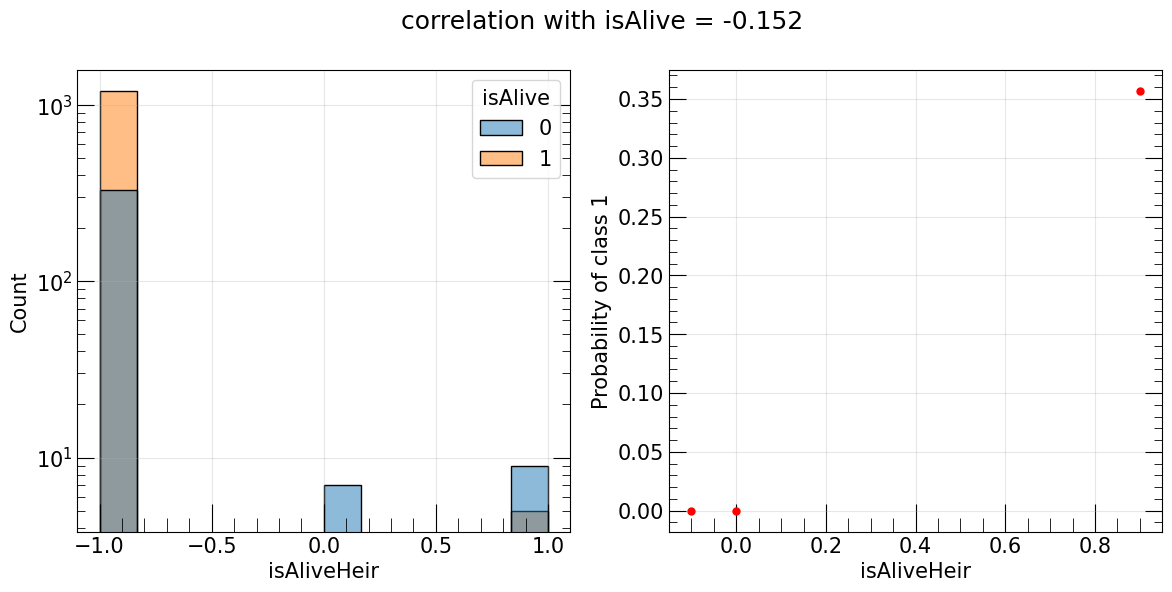

Mann_Whitney test for |isAliveHeir|
statistics = 217886.0
p-value = 2.1198849719932413e-09
H0 rejected


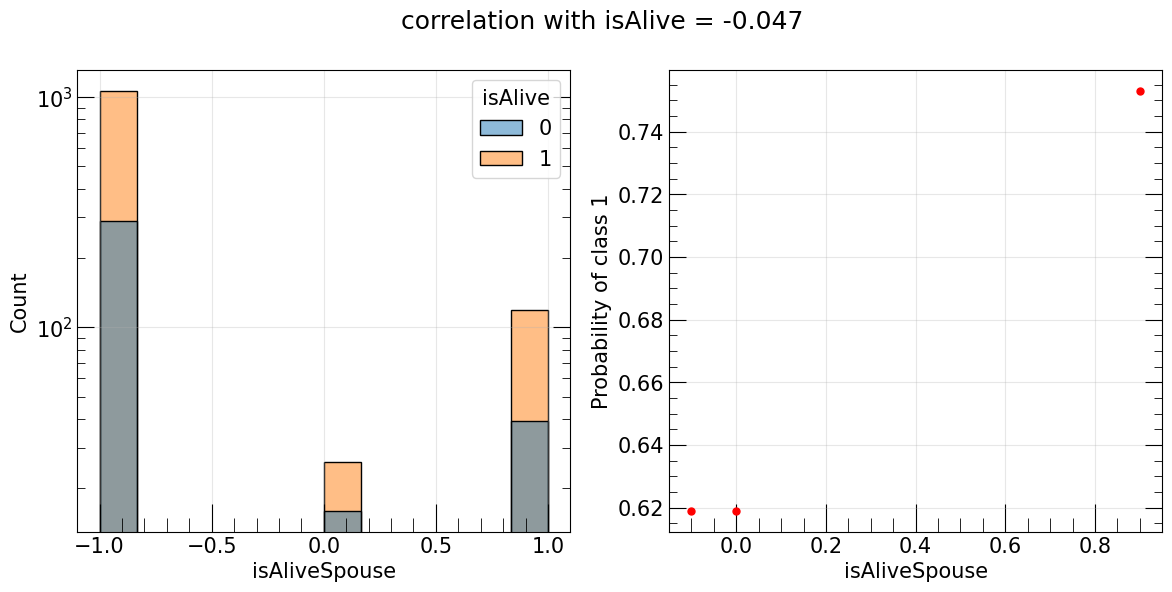

Mann_Whitney test for |isAliveSpouse|
statistics = 216942.5
p-value = 0.06567166008684965
H0 accepted


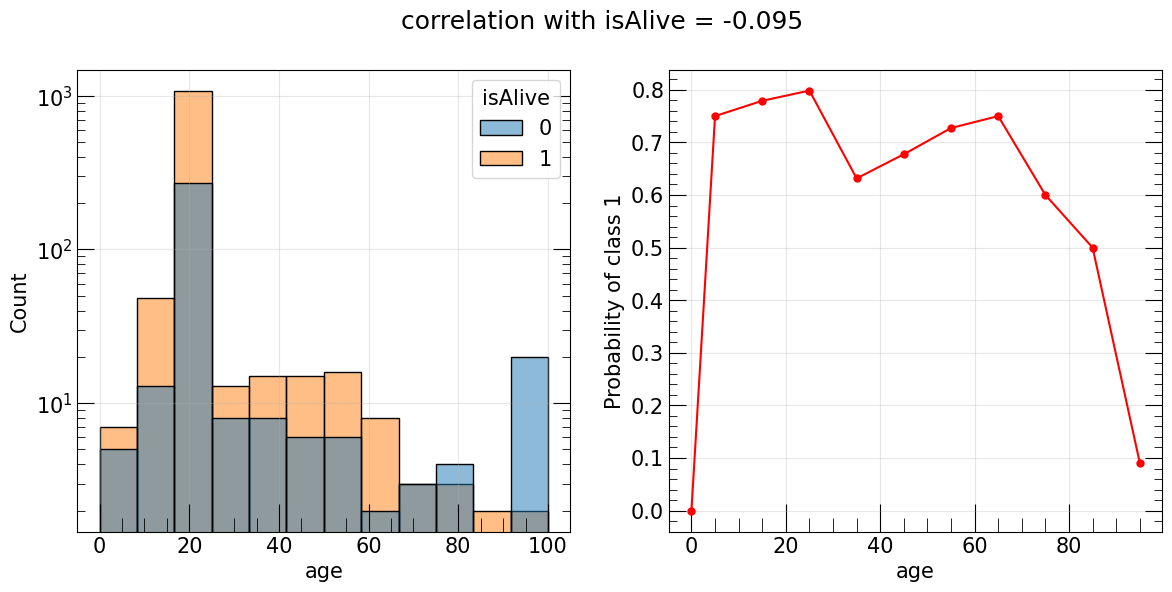

Mann_Whitney test for |age|
statistics = 227291.5
p-value = 0.0001860410271245579
H0 rejected


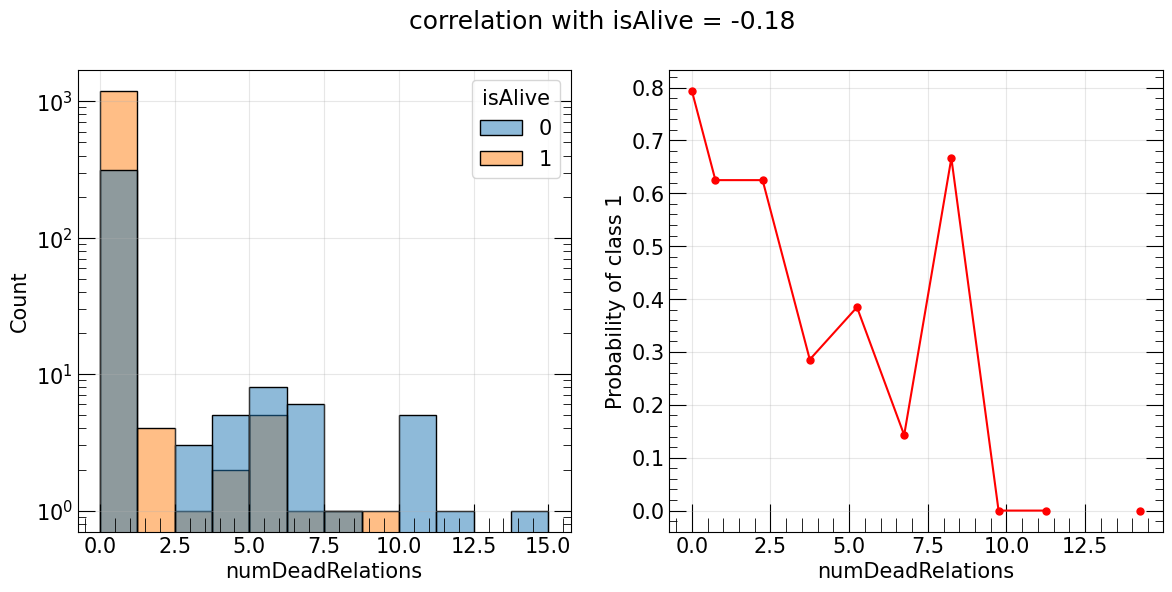

Mann_Whitney test for |numDeadRelations|
statistics = 227775.5
p-value = 1.0813173063906814e-12
H0 rejected


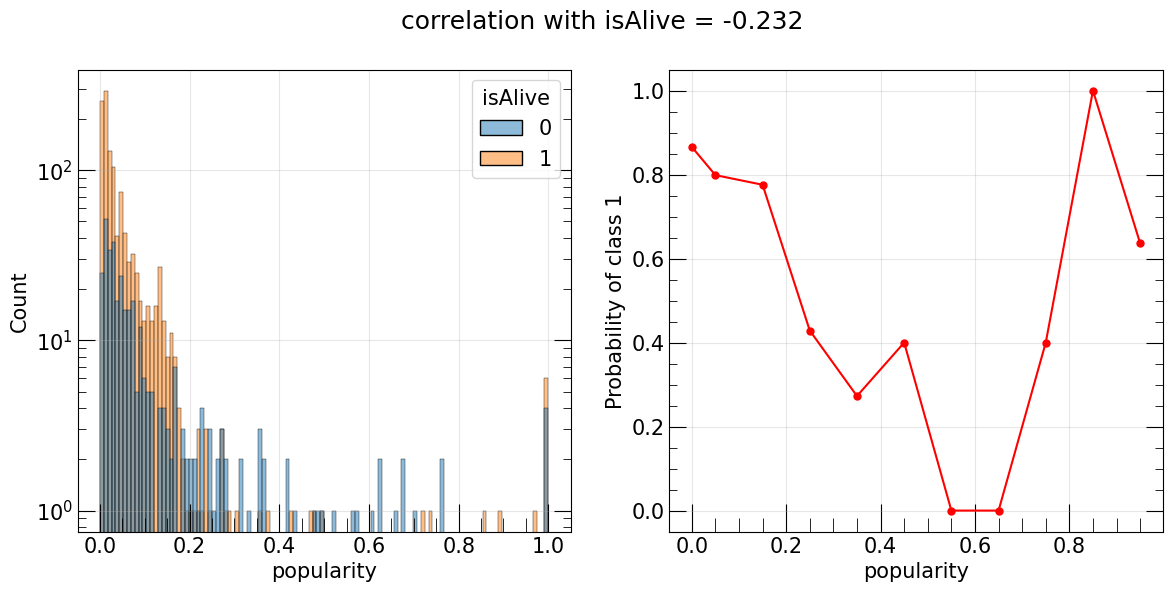

Mann_Whitney test for |popularity|
statistics = 276276.5
p-value = 6.707409853375585e-20
H0 rejected


In [38]:
correlations = {}
test_p_values = {}
feature_types = {}

for i in column_types['numerical']:
    correlations[i] = integer_feature_test(data_train_imputed, integer_col_dict, i, target_col)
    test_p_values[i] = mann_whitney(data_train_imputed, i, target_col)[1]
    feature_types[i] = "numerical"

In [39]:
pd.DataFrame(index=correlations.keys(), columns=['correlation', 'p_value', 'type'],
             data=np.array([list(correlations.values()),
                            list(test_p_values.values()),
                            list(feature_types.values())]).T)\
    .sort_values(by="correlation", ascending=False)

,correlation,p_value,type
dateOfBirth,0.25,7.431460777333803e-23,numerical
popularity,-0.232,6.707409853375585e-20,numerical
numDeadRelations,-0.18,1.0813173063906814e-12,numerical
isAliveMother,-0.159,3.3126883573011517e-10,numerical
isAliveHeir,-0.152,2.1198849719932413e-09,numerical
isAliveFather,-0.146,9.190340691156956e-09,numerical
age,-0.095,0.0001860410271245579,numerical
isAliveSpouse,-0.047,0.06567166008684965,numerical


#### Выводы

* Колонки, которые являются индикаторами наличия живых родственников почти полностью заполнены пропусками, их можно отбросить
* Колонка `age` по идее линейно связана с колонкой `dateOfBirth`, но пока отбрасывать её не будем. Видно, как миниум, что те, кто родился и те, чей возраст близок к 100 годам с большой вероятностью уже не живы

In [40]:
columns_to_drop = ["isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse"]

#### Бинарные признаки

In [41]:
from tabulate import tabulate

In [42]:
def binary_feature_test(data: pd.DataFrame, col: str, target: str) -> None:
    """
    Построение countplot бинарного признака относительно целевой переменной
    
    Parameters
    ----------
    data : pd.DataFrame
        Набор данных для проверки
    col : str
        Бинарный признак
    traget : str
        Целевой признак
    to_save : bool
        Сохранять или не сохранять график
        
    Returns
    -------
    correlation : float
    """
    
    plt.figure(figsize=(8, 6))
    axis = plt.subplot(1, 1, 1)
    
    sns.countplot(data=data,
                  x=col,
                  hue=target)

    correlation = round(data[[col, target]].corr().iloc[0, 1], 3)
    title = f'Correlation with target = {correlation}'
    axis.set(ylabel='Count', title=title)
    axis.tick_params('x', length=0, width=0, which='both')

    for c, t in zip(axis.containers, [0, 1]):
        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        test = data[data[target] == t][target].count()
        labels = []
        for v, g in zip(c, sorted(data[col].unique())):
            denominator = data[data[col] == g][target].count()
            numerator = v.get_height()
            labels.append(f'{numerator/denominator*100:0.1f}%')
        axis.bar_label(c, labels=labels, label_type='edge')
    return correlation

In [43]:
def chi2_contingency_test(data: pd.DataFrame, col: str, target: str, alpha: float = 0.05)-> tuple:
    """
    Тест на наличие статистических значимых различий в распределении категориального признака относительно
    другого категориального признака. Строится таблица, вычисляется p-value.
    
    Parameters
    ----------
    data : pd.DataFrame
        Набор данных для проверки
    column : str
        Признак, распределения которого будут проверяться
    target : str
        Признак (обычно целевая переменная), по которому выборка будет делиться на две подвыборки
    alpha : float
        Критическое значение p-value. Если значение p-value ниже этого параметра, нулевая гипотеза 
        о принадлежности распределений одной выборке отбрасывается.
        
    Returns
    -------
    stat : float
    p_value : float
    """
    print(f'Chi2 contingency test for |{col}|')
    table = pd.crosstab(data[col], data[target])
    # if data[col].nunique() < 15:
    #     print(tabulate(table, headers='keys', tablefmt='psql'))
    table = table.to_numpy()
    res = stats.chi2_contingency(table)
    stat = res.statistic
    p_value = res.pvalue
    print(f'ndf = {res.dof}')
    print(f'statistics = {res.statistic}')
    print(f'p-value = {res.pvalue}')
    if res.pvalue < alpha:
        print('H0 rejected')
    else:
        print('H0 accepted')
    return stat, p_value

In [44]:
column_types['binary']

['male',
 'book1',
 'book2',
 'book3',
 'book4',
 'book5',
 'isMarried',
 'isNoble',
 'isPopular',
 'boolDeadRelations']

Chi2 contingency test for |male|
ndf = 1
statistics = 33.51612392011613
p-value = 7.067565694754228e-09
H0 rejected
Chi2 contingency test for |book1|
ndf = 1
statistics = 18.918999753281796
p-value = 1.3638753830231697e-05
H0 rejected
Chi2 contingency test for |book2|
ndf = 1
statistics = 4.599290195259752
p-value = 0.031985196134225645
H0 rejected
Chi2 contingency test for |book3|
ndf = 1
statistics = 0.4428921515090447
p-value = 0.5057298300934916
H0 accepted
Chi2 contingency test for |book4|
ndf = 1
statistics = 124.21901776655922
p-value = 7.543980442357377e-29
H0 rejected
Chi2 contingency test for |book5|
ndf = 1
statistics = 1.485327182930439
p-value = 0.22294289156389055
H0 accepted
Chi2 contingency test for |isMarried|
ndf = 1
statistics = 3.449623661755612
p-value = 0.06326617347712221
H0 accepted
Chi2 contingency test for |isNoble|
ndf = 1
statistics = 5.422529404257693
p-value = 0.019878541843670997
H0 rejected
Chi2 contingency test for |isPopular|
ndf = 1
statistics = 27.67

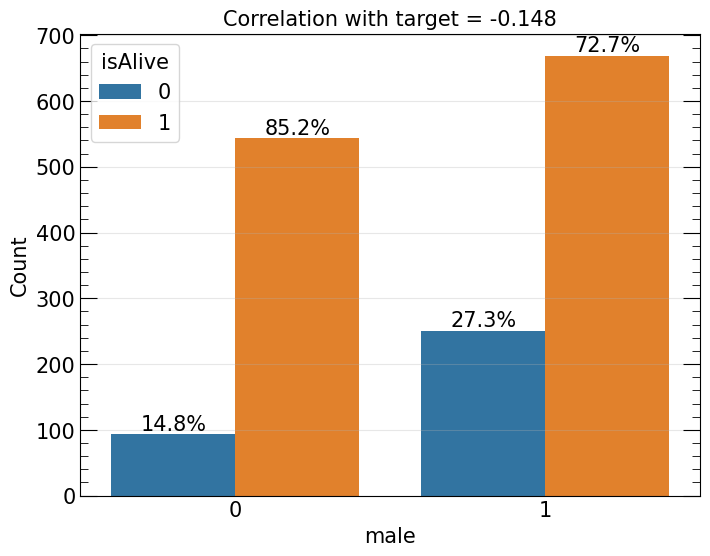

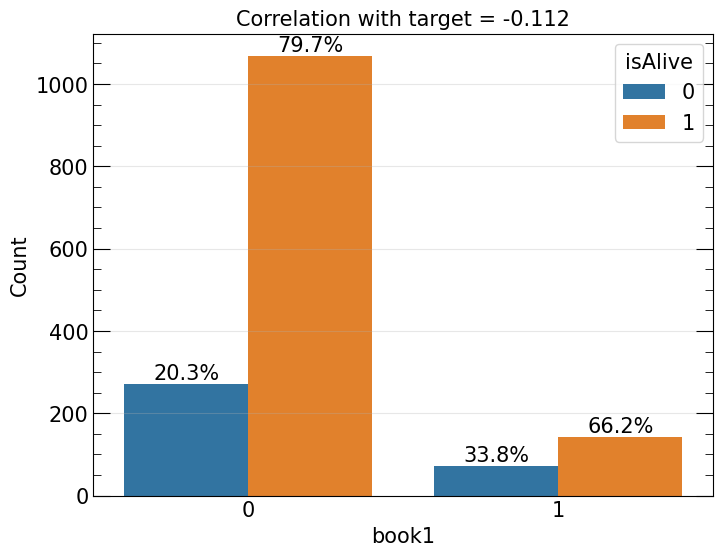

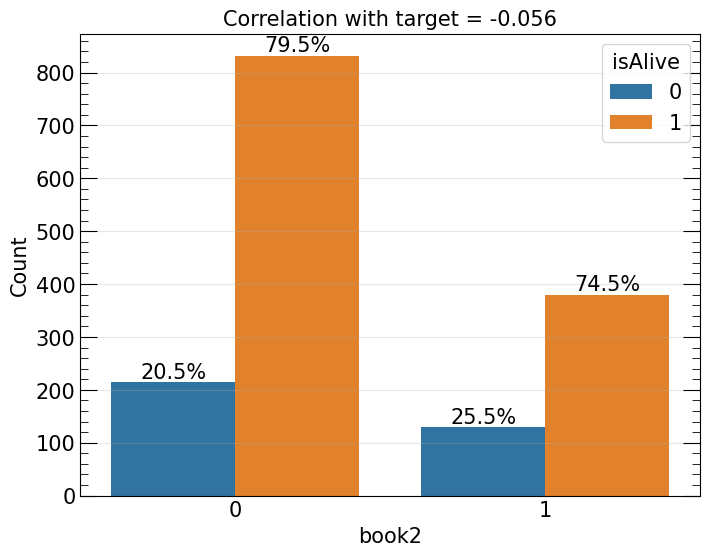

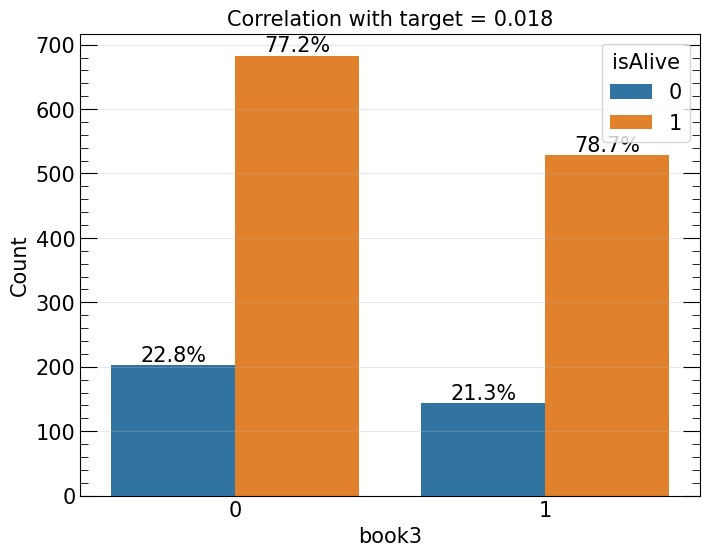

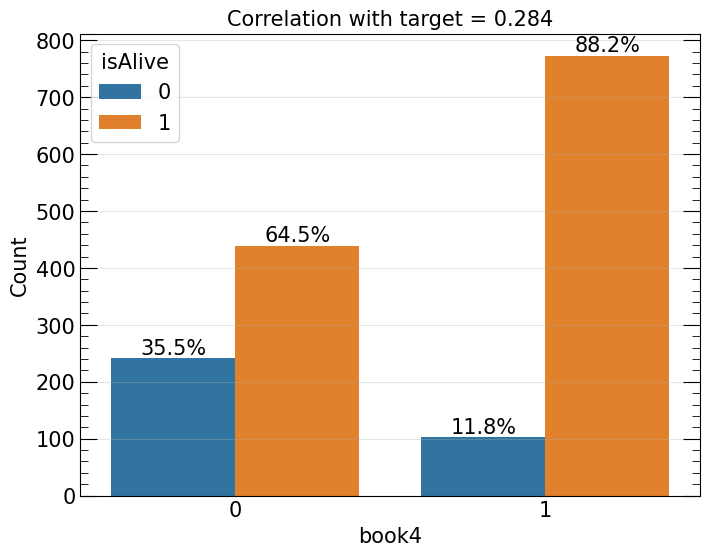

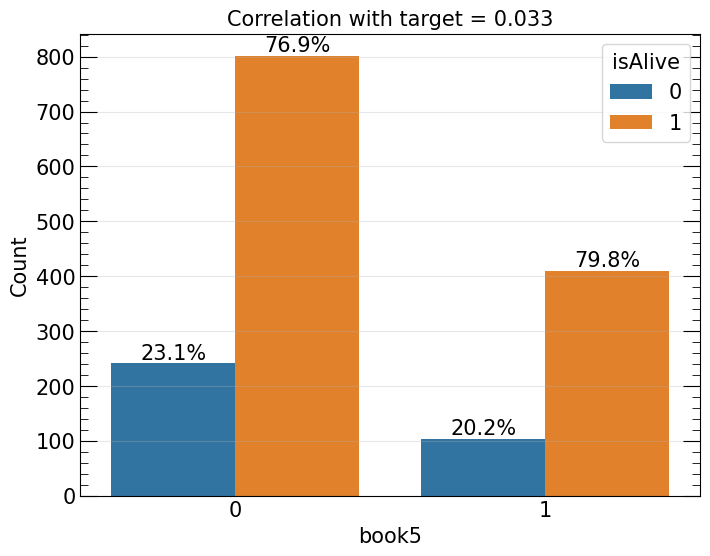

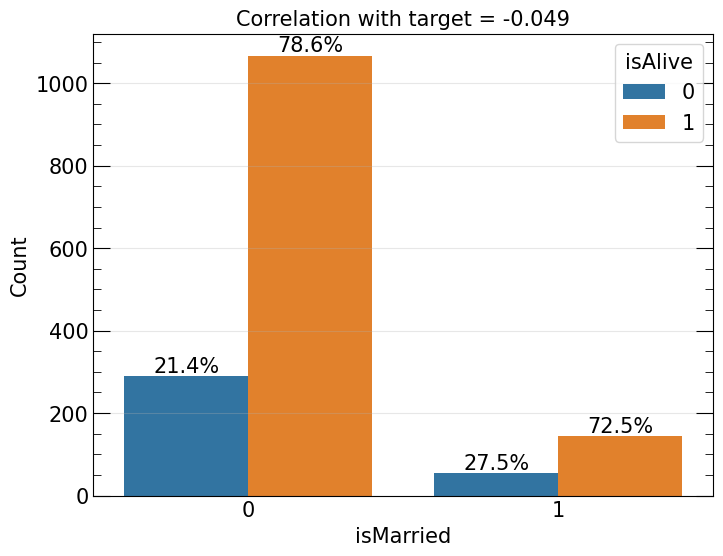

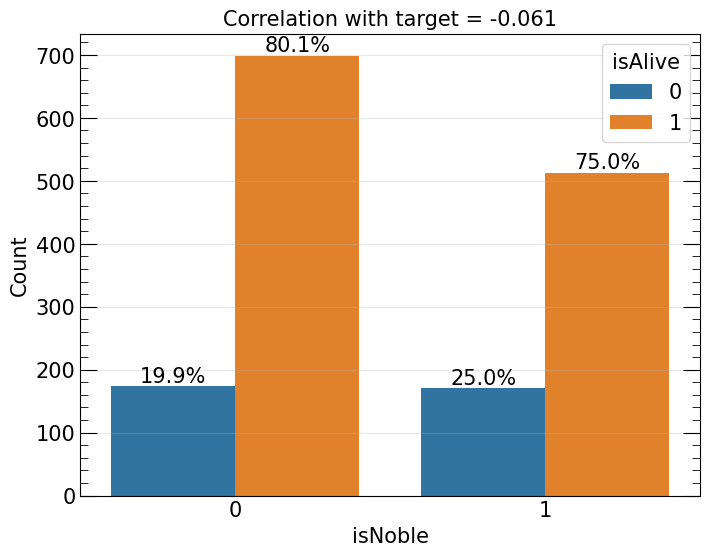

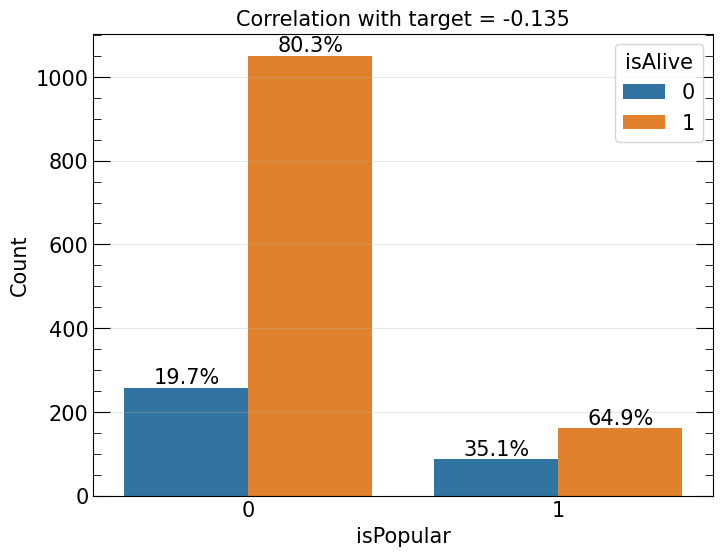

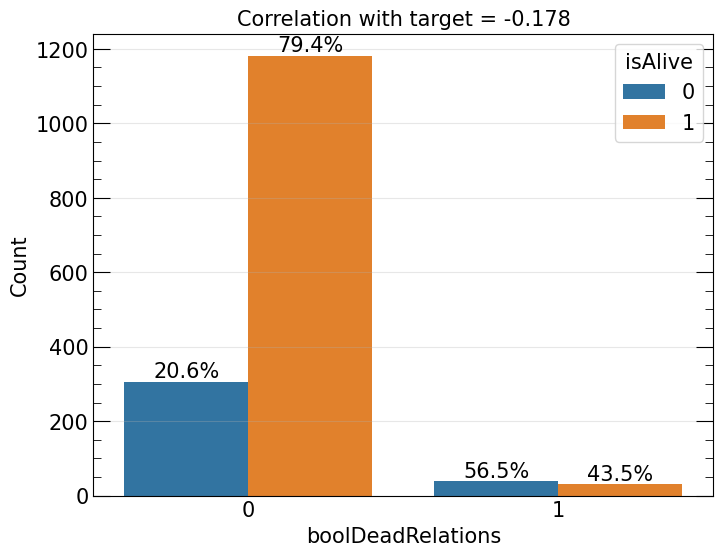

In [45]:
for i in column_types['binary']:
    correlations[i] = binary_feature_test(data_train_imputed, i, target_col)
    test_p_values[i] = chi2_contingency_test(data_train_imputed, i, target_col)[1]
    feature_types[i] = 'binary'

In [46]:
pd.DataFrame(index=correlations.keys(), columns=['correlation', 'p_value', 'type'],
             data=np.array([list(correlations.values()),
                            list(test_p_values.values()),
                            list(feature_types.values())]).T)\
    .sort_values(["type", "correlation"], ascending=False)

,correlation,p_value,type
dateOfBirth,0.25,7.431460777333803e-23,numerical
popularity,-0.232,6.707409853375585e-20,numerical
numDeadRelations,-0.18,1.0813173063906814e-12,numerical
isAliveMother,-0.159,3.3126883573011517e-10,numerical
isAliveHeir,-0.152,2.1198849719932413e-09,numerical
isAliveFather,-0.146,9.190340691156956e-09,numerical
age,-0.095,0.0001860410271245579,numerical
isAliveSpouse,-0.047,0.06567166008684965,numerical
book4,0.284,7.543980442357377e-29,binary
book5,0.033,0.22294289156389055,binary


#### Выводы

Отбрасываем книги, крому четвёртой и первой и переменную `isMarried`, остальное пока оставим

In [47]:
columns_to_drop += ["book2", "book3", "book5", "isMarried"]
columns_to_drop

['isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse',
 'book2',
 'book3',
 'book5',
 'isMarried']

#### Категориальные переменные

In [48]:
for i in column_types['categorical']:
    correlations[i] = np.nan
    test_p_values[i] = chi2_contingency_test(data_train_imputed, i, target_col)[1]
    feature_types[i] = 'categorical'

Chi2 contingency test for |title|
ndf = 194
statistics = 288.20575040951724
p-value = 1.299273179804253e-05
H0 rejected
Chi2 contingency test for |culture|
ndf = 28
statistics = 107.91981640246036
p-value = 2.53927034380435e-11
H0 rejected
Chi2 contingency test for |mother|
ndf = 16
statistics = 51.10755205383238
p-value = 1.5247791910217255e-05
H0 rejected
Chi2 contingency test for |father|
ndf = 19
statistics = 55.48525113543785
p-value = 1.958258536185622e-05
H0 rejected
Chi2 contingency test for |heir|
ndf = 20
statistics = 58.117936590279264
p-value = 1.3870161969276688e-05
H0 rejected
Chi2 contingency test for |house|
ndf = 315
statistics = 392.4799217538023
p-value = 0.001920606705230766
H0 rejected
Chi2 contingency test for |spouse|
ndf = 186
statistics = 221.45187446606633
p-value = 0.038626816089060316
H0 rejected


In [49]:
pd.DataFrame(index=correlations.keys(), columns=['correlation', 'p_value', 'type'],
             data=np.array([list(correlations.values()),
                            list(test_p_values.values()),
                            list(feature_types.values())]).T)\
    .sort_values(["type", "correlation"], ascending=False)

,correlation,p_value,type
dateOfBirth,0.25,7.431460777333803e-23,numerical
popularity,-0.232,6.707409853375585e-20,numerical
numDeadRelations,-0.18,1.0813173063906814e-12,numerical
isAliveMother,-0.159,3.3126883573011517e-10,numerical
isAliveHeir,-0.152,2.1198849719932413e-09,numerical
isAliveFather,-0.146,9.190340691156956e-09,numerical
age,-0.095,0.0001860410271245579,numerical
isAliveSpouse,-0.047,0.06567166008684965,numerical
title,nan,1.299273179804253e-05,categorical
culture,nan,2.53927034380435e-11,categorical


#### Выводы

Категориальные признаки, которые можно отбросить: `spouse`, `mother`, `father`, `heir`

In [50]:
columns_to_drop += ['spouse', 'mother', 'father', 'heir']
columns_to_drop

['isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse',
 'book2',
 'book3',
 'book5',
 'isMarried',
 'spouse',
 'mother',
 'father',
 'heir']

In [51]:
data_train_imputed_short = data_train_imputed.drop(columns_to_drop, axis=1)
data_test_imputed_short = data_test_imputed.drop(columns_to_drop, axis=1)

data_train_imputed_short.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              1557 non-null   object 
 2   male               1557 non-null   int64  
 3   culture            1557 non-null   object 
 4   dateOfBirth        1557 non-null   float64
 5   house              1557 non-null   object 
 6   book1              1557 non-null   int64  
 7   book4              1557 non-null   int64  
 8   isNoble            1557 non-null   int64  
 9   age                1557 non-null   float64
 10  numDeadRelations   1557 non-null   int64  
 11  popularity         1557 non-null   float64
 12  isAlive            1557 non-null   int64  
 13  isPopular          1557 non-null   int8   
 14  boolDeadRelations  1557 non-null   int8   
dtypes: float64(3), int64(6), int8(2), object(4)
memory usage: 173.3+ KB


## **Задание 1.6.**
Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [52]:
data_train_imputed_short[target_col].value_counts() / len(data_train_imputed_short)

isAlive
1    0.77842
0    0.22158
Name: count, dtype: float64

#### Выводы

Целевая переменная - категориальная (бинарная), то есть решается задача бинарной классификации<br>
Дисбаланс классов есть (живых больше), но он не сильный.

## **Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

### Кодирование категориальных признаков

In [53]:
data_train_imputed_short.columns[data_train_imputed_short.dtypes == object]

Index(['name', 'title', 'culture', 'house'], dtype='object')

In [163]:
selected_cat_features = ['title'] # , 'culture', 'house'

for i in selected_cat_features:
    print(i)
    print('-'*30)
    print(data_train_imputed_short[i].value_counts())
    print('-'*60)

title
------------------------------
title
Ser                     1146
Maester                   29
Archmaester               21
Lord                      19
Septon                    16
                        ... 
Lord of Greyshield         1
Lord of the Crossing       1
Felwood                    1
Goldgrass                  1
Highgarden                 1
Name: count, Length: 195, dtype: int64
------------------------------------------------------------


Уникальных значений признаков много, попробуем использовать target encoder или CatBoost encoder

In [164]:
from category_encoders import CatBoostEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import FunctionTransformer

In [165]:
te = TargetEncoder(cols=selected_cat_features, return_df=True)

te.fit(X = data_train_imputed_short.drop(target_col, axis=1),
       y = data_train_imputed_short[target_col])

data_train_imputed_short_te = te.transform(data_train_imputed_short.drop(target_col, axis=1))
data_test_imputed_short_te = te.transform(data_test_imputed_short)
data_train_imputed_short_te[target_col] = data_train_imputed_short[target_col]

data_train_imputed_short_te.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              1557 non-null   float64
 2   male               1557 non-null   int64  
 3   culture            1557 non-null   object 
 4   dateOfBirth        1557 non-null   float64
 5   house              1557 non-null   object 
 6   book1              1557 non-null   int64  
 7   book4              1557 non-null   int64  
 8   isNoble            1557 non-null   int64  
 9   age                1557 non-null   float64
 10  numDeadRelations   1557 non-null   int64  
 11  popularity         1557 non-null   float64
 12  isPopular          1557 non-null   int8   
 13  boolDeadRelations  1557 non-null   int8   
 14  isAlive            1557 non-null   int64  
dtypes: float64(4), int64(6), int8(2), object(3)
memory usage: 173.3+ KB


#### Pipleline

Для предобработки исходных данных напишем пайплайн, который реализует все преобразования в одной последовательности. Это делает код более лаконичным, когда приступим к тестам моделей это пригодится. К тому же, если работать дальше, так будет проще

In [166]:
def create_features(X):
	popularity_thr = 0.1
	cult = {
	    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
	    'Ghiscari': ['ghiscari', 'ghiscaricari', 'ghis'],
	    'Asshai': ["asshai'i", 'asshai'],
	    'Lysene': ['lysene', 'lyseni'],
	    'Andal': ['andal', 'andals'],
	    'Braavosi': ['braavosi', 'braavos'],
	    'Dornish': ['dornishmen', 'dorne', 'dornish'],
	    'Myrish': ['myr', 'myrish', 'myrmen'],
	    'Westermen': ['westermen', 'westerman', 'westerlands'],
	    'Westerosi': ['westeros', 'westerosi'],
	    'Stormlander': ['stormlands', 'stormlander'],
	    'Norvoshi': ['norvos', 'norvoshi'],
	    'Northmen': ['the north', 'northmen', "Northern mountain clans"],
	    'Free Folk': ['wildling', 'first men', 'free folk'],
	    'Qartheen': ['qartheen', 'qarth'],
	    'Reach': ['the reach', 'reach', 'reachmen'],
	    'Ironborn': ['Ironmen', 'ironborn'],
	    'Lhazareen': ['Lhazarene'],
	    'Vale': ['Vale mountain clans', 'Valemen']
	}

	X['isPopular'] = (X.popularity > popularity_thr).astype(np.int8)
	X['boolDeadRelations'] = (X['numDeadRelations'] > 0).astype(np.int8)
	X['culture'] = X['culture'].apply(lambda x: transform_culture(x, cult))

	return X

func_transformer = FunctionTransformer(create_features, validate=False)

In [167]:
columns_to_drop += list(set(columns_to_drop + ['culture', 'house']))

cols_to_train = [i for i in data_train_imputed if not i in columns_to_drop + [target_col, 'name']]
selector = ColumnTransformer([("selector", "passthrough", cols_to_train)],
                             remainder="drop", verbose_feature_names_out=False)
selector.set_output(transform="pandas")

te = TargetEncoder(cols=selected_cat_features, return_df=True)

imputer = MySimpleImputer()

pipeline = Pipeline(steps=[
    ('imputer', imputer),
    ('creator', func_transformer),
    ("selector", selector),
    ("encoder", te)
])

pipeline.fit(X = data_train, y = data_train[target_col])
data_train_final = pipeline.transform(data_train)
data_test_final = pipeline.transform(data_test)

data_train_final[target_col] = data_train[target_col]

data_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   float64
 1   male               1557 non-null   int64  
 2   culture            1557 non-null   object 
 3   dateOfBirth        1557 non-null   float64
 4   house              1557 non-null   object 
 5   book1              1557 non-null   int64  
 6   book4              1557 non-null   int64  
 7   isNoble            1557 non-null   int64  
 8   age                1557 non-null   float64
 9   numDeadRelations   1557 non-null   int64  
 10  popularity         1557 non-null   float64
 11  isPopular          1557 non-null   int8   
 12  boolDeadRelations  1557 non-null   int8   
 13  isAlive            1557 non-null   int64  
dtypes: float64(4), int64(6), int8(2), object(2)
memory usage: 161.2+ KB


In [60]:
data_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              389 non-null    float64
 1   male               389 non-null    int64  
 2   culture            389 non-null    float64
 3   dateOfBirth        389 non-null    float64
 4   house              389 non-null    float64
 5   book1              389 non-null    int64  
 6   book4              389 non-null    int64  
 7   isNoble            389 non-null    int64  
 8   age                389 non-null    float64
 9   numDeadRelations   389 non-null    int64  
 10  popularity         389 non-null    float64
 11  isPopular          389 non-null    int8   
 12  boolDeadRelations  389 non-null    int8   
dtypes: float64(6), int64(5), int8(2)
memory usage: 37.2 KB


### Количественные признаки

In [67]:
numeric_cols = data_train_imputed_short.columns[data_train_imputed_short.dtypes != object]
numeric_cols = numeric_cols.tolist()
numeric_cols

['male',
 'dateOfBirth',
 'book1',
 'book4',
 'isNoble',
 'age',
 'numDeadRelations',
 'popularity',
 'isAlive',
 'isPopular',
 'boolDeadRelations']

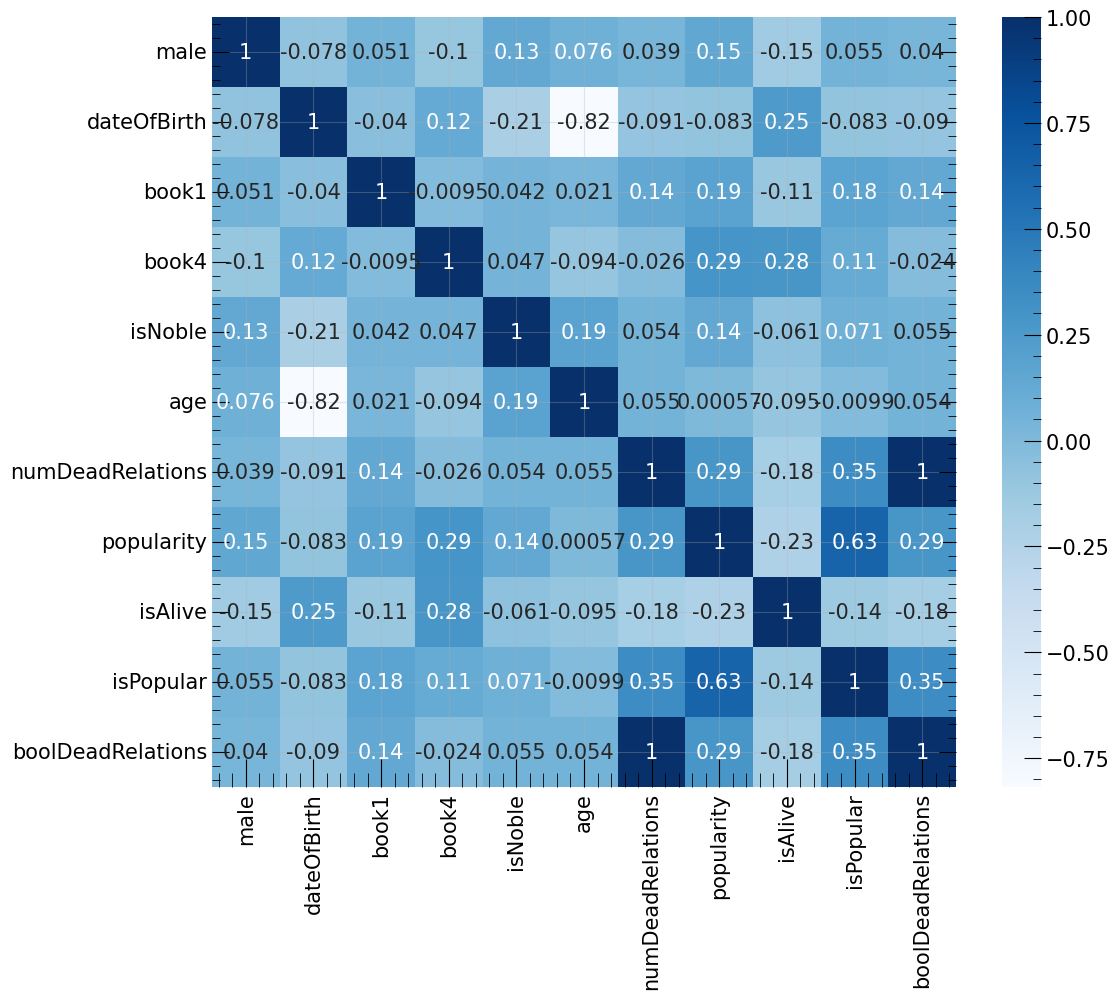

In [76]:
# plt.rcParams.update({'xtick.labelsize': 13,
#                      'ytick.labelsize': 13})
plt.figure(figsize=(12, 10))

sns.heatmap(data_train_imputed_short[numeric_cols].corr(method='spearman'),
            cmap="Blues", annot=True)
plt.show()

In [90]:
df_corr = data_train_imputed_short[numeric_cols].corr(method='spearman')
df_corr

,male,dateOfBirth,book1,book4,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
male,1.000000,-0.077668,0.050526,-0.101674,0.133807,0.076416,0.039462,0.152415,-0.148290,0.055194,0.039540
dateOfBirth,-0.077668,1.000000,-0.040241,0.120620,-0.206860,-0.818000,-0.091333,-0.082891,0.249504,-0.082514,-0.090072
book1,0.050526,-0.040241,1.000000,-0.009461,0.041593,0.020566,0.137971,0.188716,-0.112468,0.180736,0.139291
book4,-0.101674,0.120620,-0.009461,1.000000,0.047394,-0.094006,-0.026312,0.292869,0.284014,0.114882,-0.024038
isNoble,0.133807,-0.206860,0.041593,0.047394,1.000000,0.189283,0.053826,0.139976,-0.060572,0.070911,0.054631
age,0.076416,-0.818000,0.020566,-0.094006,0.189283,1.000000,0.054764,0.000569,-0.094746,-0.009876,0.054234
numDeadRelations,0.039462,-0.091333,0.137971,-0.026312,0.053826,0.054764,1.000000,0.286060,-0.180497,0.351921,0.999674
popularity,0.152415,-0.082891,0.188716,0.292869,0.139976,0.000569,0.286060,1.000000,-0.231514,0.634589,0.285252
isAlive,-0.148290,0.249504,-0.112468,0.284014,-0.060572,-0.094746,-0.180497,-0.231514,1.000000,-0.135436,-0.178177
isPopular,0.055194,-0.082514,0.180736,0.114882,0.070911,-0.009876,0.351921,0.634589,-0.135436,1.000000,0.349746


In [110]:
for row, values in df_corr.iterrows():
    val_sorted = values.sort_values(key=abs, ascending=False)
    print(row, "||", val_sorted.index[1], "->",  val_sorted.values[1])
    print('-'*30)

male || popularity -> 0.15241541861139368
------------------------------
dateOfBirth || age -> -0.8179999411587967
------------------------------
book1 || popularity -> 0.18871558036366495
------------------------------
book4 || popularity -> 0.29286859535761056
------------------------------
isNoble || dateOfBirth -> -0.20686005298003998
------------------------------
age || dateOfBirth -> -0.8179999411587967
------------------------------
numDeadRelations || boolDeadRelations -> 0.9996740747056632
------------------------------
popularity || isPopular -> 0.634589244382731
------------------------------
isAlive || book4 -> 0.28401404157958976
------------------------------
isPopular || popularity -> 0.634589244382731
------------------------------
boolDeadRelations || numDeadRelations -> 0.9996740747056632
------------------------------


## **Задание 1.8.**

Проанализируйте влияние признаков на целевую переменную.

In [61]:
data_train_final

,title,male,culture,dateOfBirth,house,book1,book4,isNoble,age,numDeadRelations,popularity,isPopular,boolDeadRelations,isAlive
S.No,,,,,,,,,,,,,,
1,0.793194,1,0.781104,281.0,0.803150,0,0,0,24.0,11,0.605351,1,1,0
2,0.807249,1,0.757330,208.0,0.898755,1,1,1,97.0,1,0.896321,1,1,1
3,0.793194,1,0.781104,281.0,0.825875,0,1,1,24.0,0,0.267559,1,0,1
4,0.658181,0,0.781104,82.0,0.737359,0,0,1,23.0,0,0.183946,1,0,0
5,0.807249,0,0.869746,276.0,0.809851,0,1,1,29.0,0,0.043478,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,0.894745,1,0.781104,281.0,0.803150,1,1,1,24.0,0,0.160535,1,0,1
1554,0.793194,0,0.781104,281.0,0.803150,1,0,0,24.0,0,0.040134,0,0,0
1555,0.793194,1,0.781104,281.0,0.703495,0,1,0,24.0,0,0.076923,0,0,0


## **Задание 1.9.**

Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [115]:
data_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   float64
 1   male               1557 non-null   int64  
 2   culture            1557 non-null   float64
 3   dateOfBirth        1557 non-null   float64
 4   house              1557 non-null   float64
 5   book1              1557 non-null   int64  
 6   book4              1557 non-null   int64  
 7   isNoble            1557 non-null   int64  
 8   age                1557 non-null   float64
 9   numDeadRelations   1557 non-null   int64  
 10  popularity         1557 non-null   float64
 11  isPopular          1557 non-null   int8   
 12  boolDeadRelations  1557 non-null   int8   
 13  isAlive            1557 non-null   int64  
dtypes: float64(6), int64(6), int8(2)
memory usage: 161.2 KB


In [116]:
X = data_train_final.drop([target_col], axis=1)
y = data_train_final[target_col]

X.head()

,title,male,culture,dateOfBirth,house,book1,book4,isNoble,age,numDeadRelations,popularity,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,
1,0.793194,1,0.781104,281.0,0.803150,0,0,0,24.0,11,0.605351,1,1
2,0.807249,1,0.757330,208.0,0.898755,1,1,1,97.0,1,0.896321,1,1
3,0.793194,1,0.781104,281.0,0.825875,0,1,1,24.0,0,0.267559,1,0
4,0.658181,0,0.781104,82.0,0.737359,0,0,1,23.0,0,0.183946,1,0
5,0.807249,0,0.869746,276.0,0.809851,0,1,1,29.0,0,0.043478,0,0


## **Задание 1.10.**
Разделите датасет на train и test часть при помощи функции `train_test_split`

In [117]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape = {X_train.shape}")
print(f"Validation shape = {X_test.shape}")

Train shape = (1245, 13)
Validation shape = (312, 13)


# Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

## **Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [112]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## **Задание 2.2.**

Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [114]:
from sklearn.linear_model import LogisticRegression

In [121]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [135]:
models_list = [AdaBoostClassifier, RandomForestClassifier, GaussianProcessClassifier,
               GaussianNB, KNeighborsClassifier, SVC, DecisionTreeClassifier]

classifiers = {}
predictions_val = {}
predictions_test = {}

for model in models_list:
    print(model.__name__)
    # Шаг 1. создание модели
    cls = model()
    # Шаг 2. обучение модели
    cls.fit(X_train, y_train)
    classifiers[model.__name__] = cls
    # Шаг 3. Предсказание на тестовых данных
    predictions_val[model.__name__] = cls.predict(X_test)

AdaBoostClassifier
RandomForestClassifier
GaussianProcessClassifier
GaussianNB
KNeighborsClassifier
SVC
DecisionTreeClassifier


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [132]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [133]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7981


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [175]:
val_accuracy = {}

for model in models_list:
    model_name = model.__name__
    accuracy = accuracy_score(y_test, predictions_val[model_name])
    val_accuracy[model_name] = accuracy

pd.Series(val_accuracy).sort_values(ascending=False)

RandomForestClassifier       0.881410
AdaBoostClassifier           0.868590
KNeighborsClassifier         0.846154
DecisionTreeClassifier       0.826923
GaussianProcessClassifier    0.814103
SVC                          0.794872
GaussianNB                   0.785256
dtype: float64

### Выберите лучшую модель

На валидации лучшие метрики показывают `RandomForestClassifier` и `AdaBoostClassifier`. Возьмём одну из них для предсказаний на тесте. Тут только есть проблема, что в пайплайне у нас была утечка в validation выборку, по идее нужно добавить в него модель и разбить уже train на две выборке до всех заполнений пропусков и тем более таргет энкодера.

In [145]:
pd.read_csv("../data/hw_4_2_GoT/submission.csv")

,S.No,isAlive
0,1558,0
1,1559,0
2,1560,0
3,1561,0
4,1562,0
...,...,...
384,1942,0
385,1943,0
386,1944,0
387,1945,0


In [157]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(data_test_final)

test_submission = pd.DataFrame({'S.No': data_test_final.copy().reset_index()['S.No'],
                                'isAlive': pred})
test_submission.to_csv("../data/hw_4_2_GoT/submissions/submission_forest_v1.scv",
                       index_label=False)

In [159]:
pd.read_csv("../data/hw_4_2_GoT/submissions/submission_forest_v1.scv")

,S.No,isAlive
0,1558,0
1,1559,1
2,1560,1
3,1561,1
4,1562,1
...,...,...
384,1942,1
385,1943,1
386,1944,1
387,1945,1


### Pipeline

Всё по новой:
* Устранили утечку из трейна в валидацию
* Выкинули категориальные признаки

Если совсем грустно будет, начну тюнить параметры, включая набор признаков и кодировщики

In [172]:
X = data_train.drop([target_col], axis=1)
y = data_train[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape = {X_train.shape}")
print(f"Validation shape = {X_test.shape}")
print(f"Test shape = {data_test.shape}")

Train shape = (1245, 24)
Validation shape = (312, 24)
Test shape = (389, 24)


In [174]:
columns_to_drop += list(set(columns_to_drop + ['culture', 'house']))
cols_to_train = [i for i in data_train_imputed if not i in columns_to_drop + [target_col, 'name']]
selector = ColumnTransformer([("selector", "passthrough", cols_to_train)],
                             remainder="drop", verbose_feature_names_out=False)
selector.set_output(transform="pandas")

te = TargetEncoder(cols=selected_cat_features, return_df=True)
imputer = MySimpleImputer()
model = RandomForestClassifier()

pipeline = Pipeline(steps=[
    ('imputer', imputer),
    ('creator', func_transformer),
    ("selector", selector),
    ("encoder", te),
    ("cls", model)
])

pipeline.fit(X=X_train, y=y_train)
pipeline.predict(X_test)

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [177]:
val_accuracy = {}

for model in models_list:
    model_name = model.__name__
    classifier = model()
    pipeline = Pipeline(steps=[
        ('imputer', imputer),
        ('creator', func_transformer),
        ("selector", selector),
        ("encoder", te),
        ("cls", classifier)
    ])
    pipeline.fit(X=X_train, y=y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    val_accuracy[model_name] = accuracy

pd.Series(val_accuracy).sort_values(ascending=False)

GaussianProcessClassifier    0.823718
AdaBoostClassifier           0.817308
KNeighborsClassifier         0.804487
SVC                          0.794872
RandomForestClassifier       0.782051
GaussianNB                   0.766026
DecisionTreeClassifier       0.756410
dtype: float64

### На тесте

In [180]:
classifier = RandomForestClassifier()
pipeline = Pipeline(steps=[
    ('imputer', imputer),
    ('creator', func_transformer),
    ("selector", selector),
    ("encoder", te),
    ("cls", classifier)
])
pipeline.fit(X, y)
pred = pipeline.predict(data_test)

test_submission = pd.DataFrame({'S.No': data_test_final.copy().reset_index()['S.No'],
                                'isAlive': pred})

submission_name = "RandomForestClassifier_v1"
test_submission.to_csv(f"../data/hw_4_2_GoT/submissions/submission_{submission_name}.scv",
                       index_label=False)

### Модели

* GaussianProcessClassifier (втупую) - 0.78
* AdaBoostClassifier (втупую) - 0.74
* RandomForestClassifier (втупую) - 0.70

Борьбы за 1 балл не будет, хотя тут много чего ещё можно сделать...